In [9]:
import sys
import os

current_path = os.getcwd()
data_path = current_path.replace('src', 'data')

In [10]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 7.5]


In [11]:
# import data
flights_data = pd.DataFrame(pd.read_csv(data_path + '\\Australian_domestic_flights.csv'))
flights_data

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Passenger_Load_Factor,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num
0,ADELAIDE,ALICE SPRINGS,30682,15743,143,81.8,1316,20717788,25327369,19246,1984,1
1,ADELAIDE,BRISBANE,30682,3781,32,89.8,1622,6132782,6829379,4210,1984,1
2,ADELAIDE,CANBERRA,30682,1339,12,94.7,972,1301508,1374348,1414,1984,1
3,ADELAIDE,DARWIN,30682,3050,33,66.8,2619,7987950,11958009,4566,1984,1
4,ADELAIDE,GOLD COAST,30682,1596,16,88.5,1607,2564772,2898047,1803,1984,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23595,SYDNEY,WAGGA WAGGA,43678,16546,474,68.7,367,6072382,8841764,24092,2019,8
23596,SYDNEY,WAGGA WAGGA,43709,16646,490,67.9,367,6109082,8998840,24520,2019,9
23597,SYDNEY,WAGGA WAGGA,43739,17146,503,68.5,367,6292582,9180138,25014,2019,10
23598,SYDNEY,WAGGA WAGGA,43770,16171,468,69.2,367,5934757,8574588,23364,2019,11


In [12]:
# choose 2 numerical features: Seats and Passenger_Load_Factor
passenger_data = flights_data[["Seats", "Passenger_Load_Factor"]].copy()

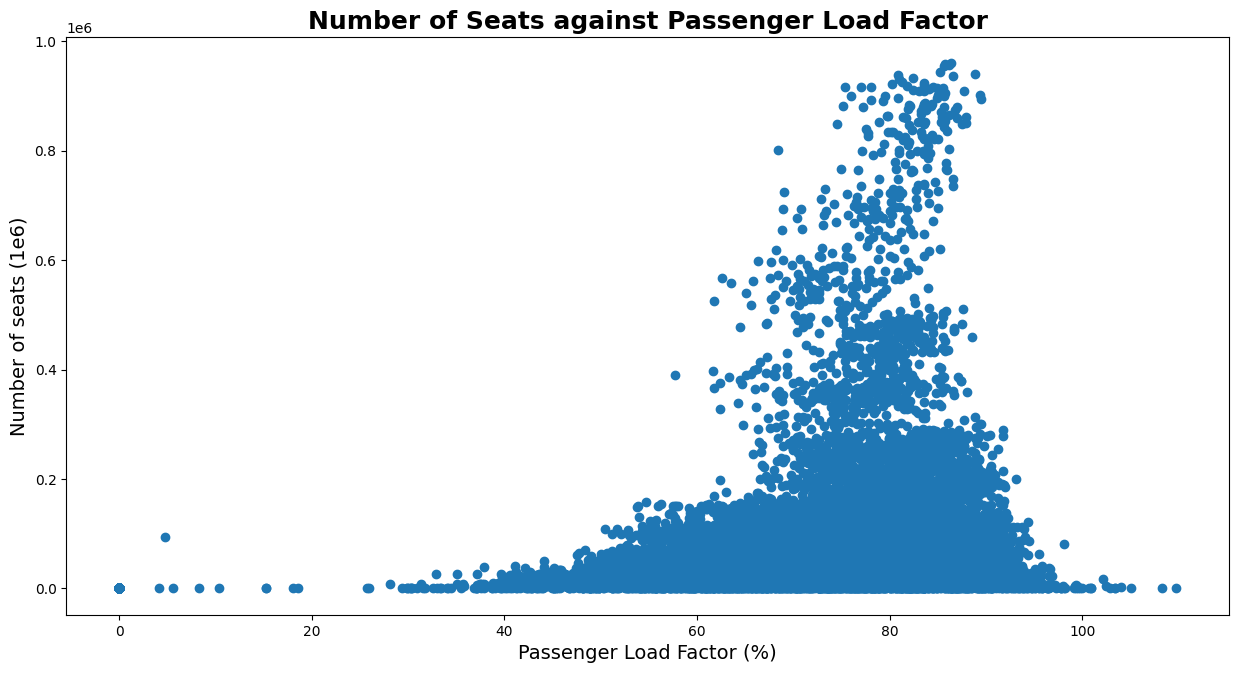

In [13]:
# Scatter
plt.scatter(x=passenger_data["Passenger_Load_Factor"], y=passenger_data["Seats"])
plt.xlabel("Passenger Load Factor (%)", size=14)
plt.ylabel("Number of seats (1e6)", size=14)
plt.title("Number of Seats against Passenger Load Factor",
          weight="bold", size=18)
plt.show()

d:\GitHub\Australian-domestic-flights\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


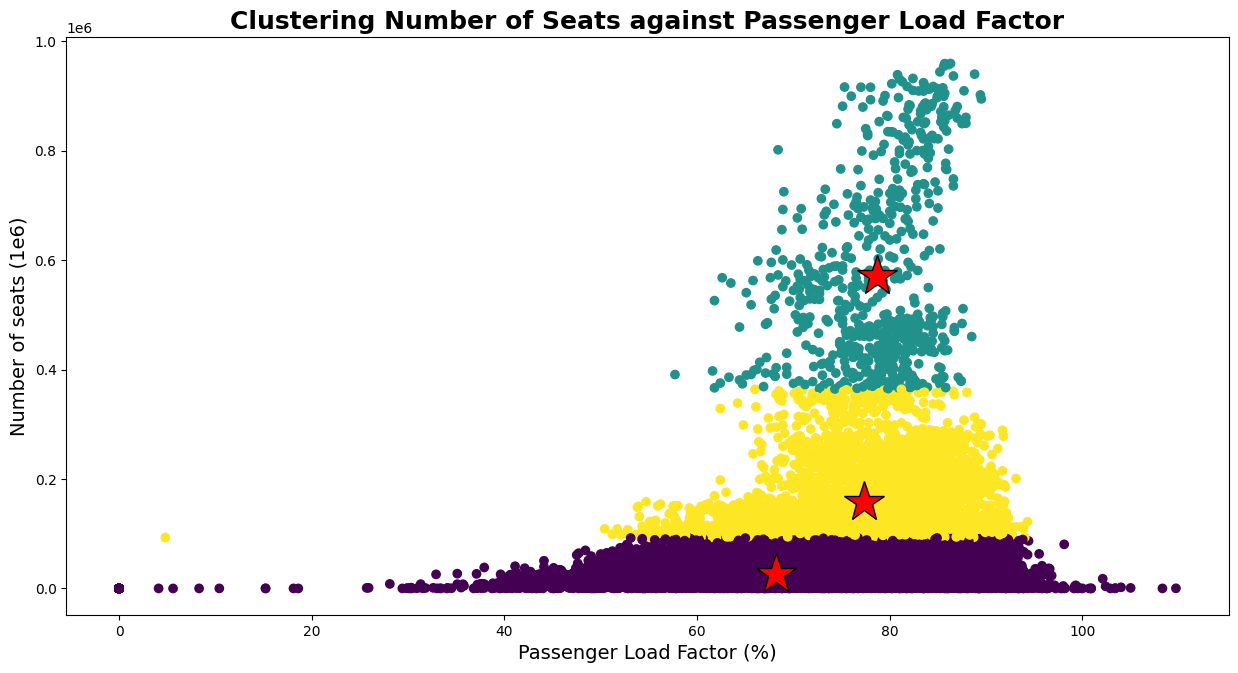

In [14]:
# fit to model
kmeans = KMeans(n_clusters=3, init="random").fit(passenger_data[["Seats", "Passenger_Load_Factor"]])

# Visualize
plt.scatter(x=passenger_data["Passenger_Load_Factor"], y=passenger_data["Seats"], c=kmeans.labels_)

# Visualise the cluster centers (black stars)
plt.plot(
    kmeans.cluster_centers_[:, 1],
    kmeans.cluster_centers_[:, 0],
    'k*',
    markerfacecolor='red',
    markersize=30
)
plt.xlabel("Passenger Load Factor (%)", size=14)
plt.ylabel("Number of seats (1e6)", size=14)
plt.title("Clustering Number of Seats against Passenger Load Factor", weight="bold", size=18)
plt.show()